In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Importing and understanding data 

In [2]:
df = pd.DataFrame(pd.read_csv("/Users/rawanawad/downloads/CarPrice_Assignment.csv"))

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape
# Data has 26 columns and 205 rows.

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data cleaning

In [8]:
#checking duplicates
sum(df.duplicated(subset = 'car_ID')) == 0
# No duplicate values

True

In [9]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [10]:
#outliers cleaning using z-score
df_nums = df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
z = np.abs(stats.zscore(df_nums))

df_cleaned = df_nums[(z < 3).all(axis=1)]
df_cleaned

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23


<AxesSubplot:>

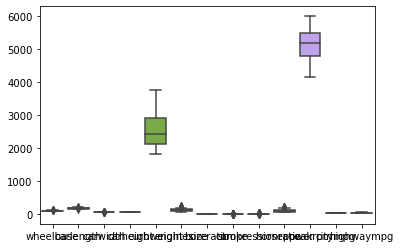

In [11]:
sns.boxplot(data = df_cleaned)

In [12]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:

df_cleaned

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23


In [14]:
df.drop(['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], axis=1, inplace=True)
df2 = df_cleaned.join(df, how='left', lsuffix='left')

In [15]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,22470.0


In [16]:
df = df2

In [17]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_ID,symboling,price
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,98.418132,173.491758,65.779670,53.684066,2526.730769,123.961538,3.336593,3.260934,9.529780,103.263736,5146.703297,24.846154,30.445055,100.785714,0.851648,12728.165753
std,5.519834,11.551393,1.965637,2.466240,475.260823,32.865264,0.260152,0.279026,2.918405,34.366190,456.705848,5.583961,5.832350,59.114022,1.267953,7065.683069
min,86.600000,144.600000,61.800000,48.800000,1819.000000,70.000000,2.680000,2.360000,7.000000,60.000000,4150.000000,15.000000,18.000000,1.000000,-2.000000,5118.000000
25%,94.500000,166.300000,64.025000,51.700000,2131.000000,97.250000,3.150000,3.112500,8.600000,72.250000,4800.000000,19.000000,25.000000,51.250000,0.000000,7747.250000
50%,96.500000,173.100000,65.400000,54.100000,2412.000000,120.000000,3.330000,3.270000,9.000000,95.000000,5200.000000,24.000000,30.000000,100.500000,1.000000,10221.500000
75%,101.200000,180.275000,66.500000,55.500000,2911.500000,141.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,29.750000,34.000000,149.750000,2.000000,16482.500000
max,115.600000,202.600000,71.700000,59.800000,3770.000000,234.000000,3.940000,3.900000,22.000000,207.000000,6000.000000,38.000000,47.000000,205.000000,3.000000,41315.000000


# Exploratory Data Analysis ( EDA )

In [18]:
df.price.describe()

count      182.000000
mean     12728.165753
std       7065.683069
min       5118.000000
25%       7747.250000
50%      10221.500000
75%      16482.500000
max      41315.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

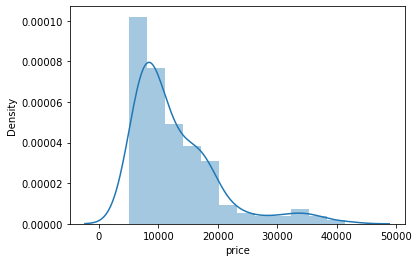

In [19]:
sns.distplot(df['price'])

In [20]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [21]:
df.sample(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,brand
41,96.5,175.4,65.2,54.1,2465,110,3.15,3.58,9.0,101,...,std,four,sedan,fwd,front,ohc,four,mpfi,12945.0,HONDA
53,93.1,166.8,64.2,54.1,1945,91,3.03,3.15,9.0,68,...,std,four,sedan,fwd,front,ohc,four,2bbl,6695.0,MAZDA
150,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62,...,std,two,hatchback,fwd,front,ohc,four,2bbl,5348.0,TOYOTA
62,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,84,...,std,four,sedan,fwd,front,ohc,four,2bbl,10245.0,MAZDA
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,...,std,four,sedan,rwd,front,ohc,six,mpfi,24565.0,BMW


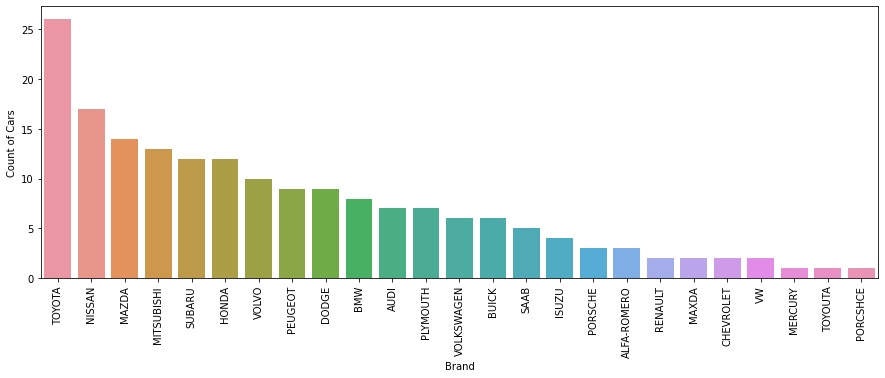

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [23]:
# fix brands names
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')

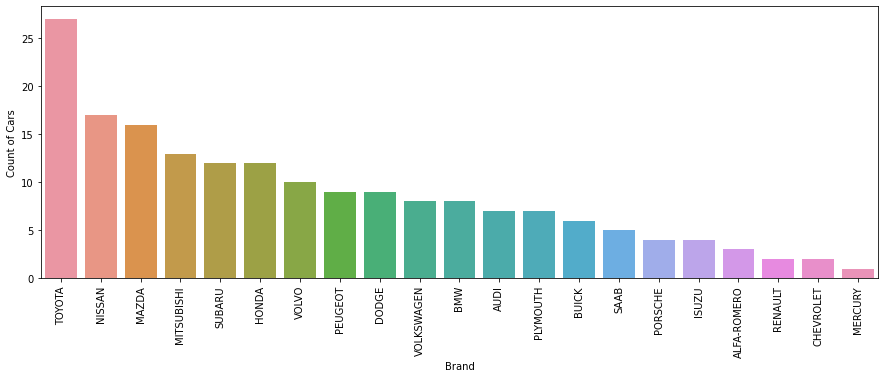

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [25]:
df.brand.describe()

count        182
unique        21
top       TOYOTA
freq          27
Name: brand, dtype: object

### Understand Price

<AxesSubplot:xlabel='price', ylabel='Density'>

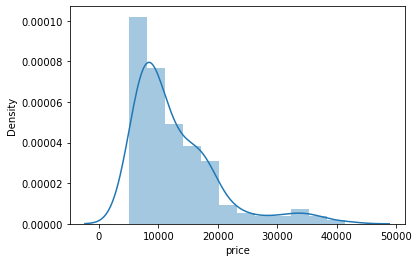

In [26]:
sns.distplot(df['price'])

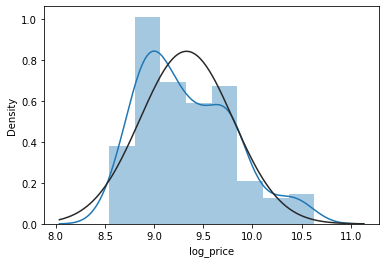

<Figure size 432x288 with 0 Axes>

In [27]:
#Log for price 
df['log_price'] = np.log(df['price'])
sns.distplot(df['log_price'], fit=norm)
fig = plt.figure();

<AxesSubplot:xlabel='price', ylabel='Density'>

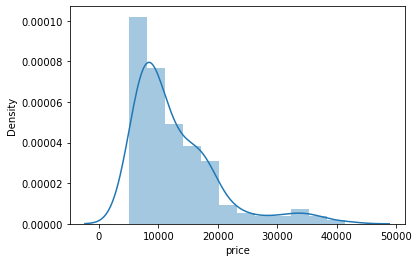

In [28]:
sns.distplot(df['price'])

## Average price per Brand

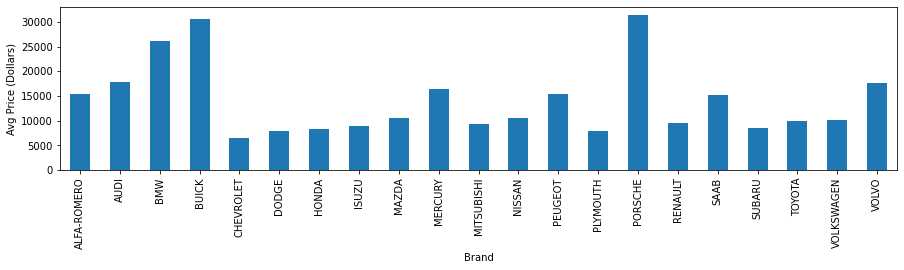

In [29]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [30]:
# merge df with brands' avg price
df = df.merge(df_comp_avg_price, on = 'brand')

In [31]:
# categorize brand based on prices
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [32]:
df.sample(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,brand,log_price,brand_avg_price,brand_category
48,93.1,166.8,64.2,54.1,1945,91,3.03,3.15,9.0,68,...,fwd,front,ohc,four,2bbl,6695.0,MAZDA,8.809116,10644.000000,Mid_Range
119,96.1,176.8,66.6,50.5,2460,132,3.46,3.90,8.7,90,...,fwd,front,ohc,four,mpfi,9895.0,RENAULT,9.199785,9595.000000,Budget
110,93.7,167.3,63.8,50.8,1989,90,2.97,3.23,9.4,68,...,fwd,front,ohc,four,2bbl,6692.0,PLYMOUTH,8.808668,7963.428571,Budget
159,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,...,fwd,front,ohc,four,mpfi,11248.0,TOYOTA,9.327946,10041.703704,Mid_Range
28,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,7.0,145,...,fwd,front,ohc,four,mfi,12964.0,DODGE,9.469932,7875.444444,Budget
15,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,...,rwd,front,ohc,six,mpfi,30760.0,BMW,10.333970,26118.750000,Luxury
94,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,152,...,fwd,front,ohcv,six,mpfi,13499.0,NISSAN,9.510371,10610.764706,Mid_Range
96,91.3,170.7,67.9,49.7,3139,181,3.43,3.27,7.8,200,...,rwd,front,ohcv,six,mpfi,19699.0,NISSAN,9.888323,10610.764706,Mid_Range
45,93.1,159.1,64.2,54.1,1890,91,3.03,3.15,9.0,68,...,fwd,front,ohc,four,2bbl,5195.0,MAZDA,8.555452,10644.000000,Mid_Range
135,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82,...,4wd,front,ohcf,four,2bbl,8013.0,SUBARU,8.988821,8541.250000,Budget


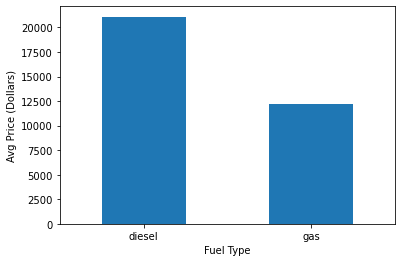

In [33]:
# find out the avg price for each fual type
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

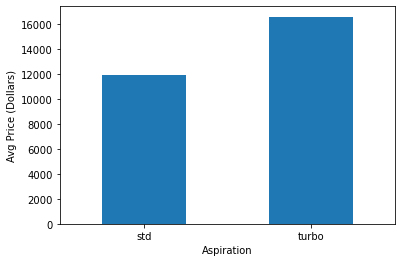

In [34]:
# find out avg price for each aspiration type
df_aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

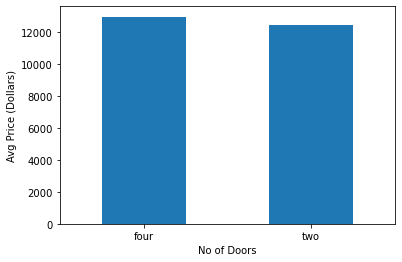

In [35]:
# find out the avg price for doors number
df_door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

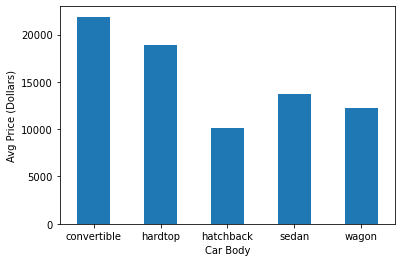

In [36]:
# find the avg price for each car body
df_body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

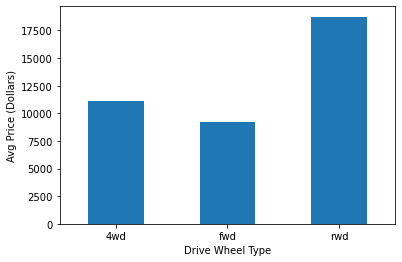

In [37]:
# find the avg price for each drive wheel type
df_drivewheel_avg_price = df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

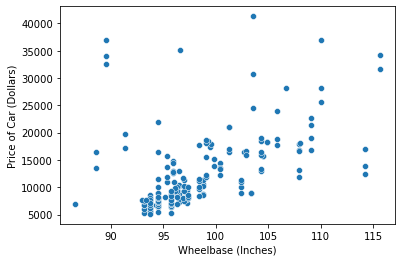

In [38]:
# find out which wheel base is the most popular and its relation to the price
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

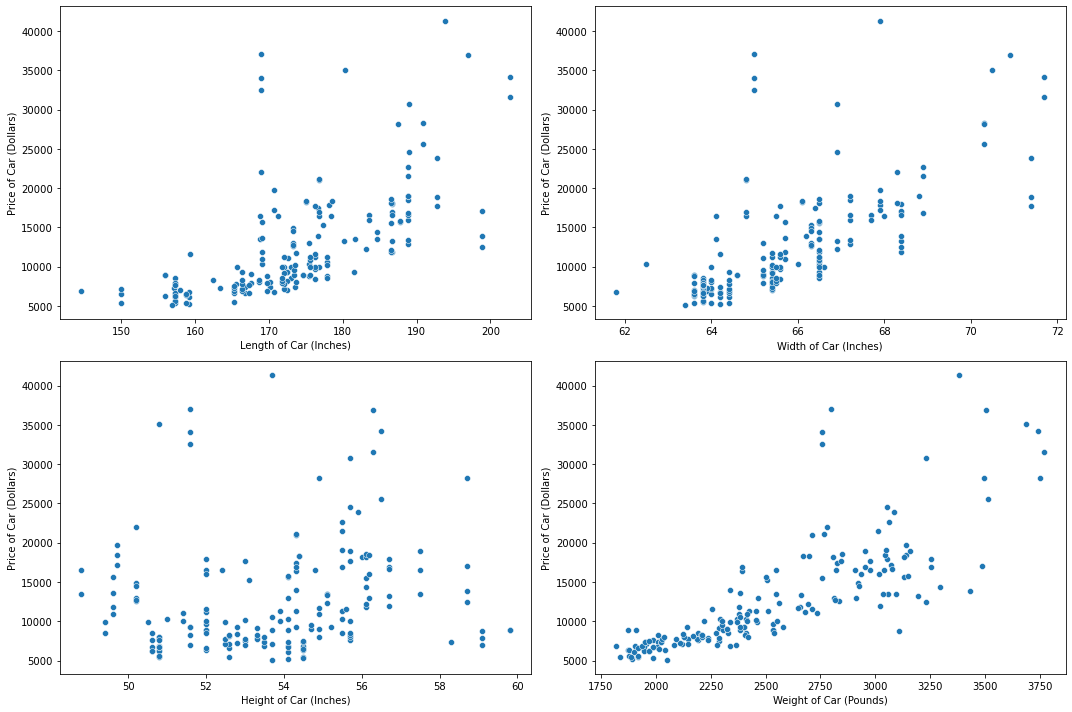

In [39]:
# understand how cars dimensions effect the price
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

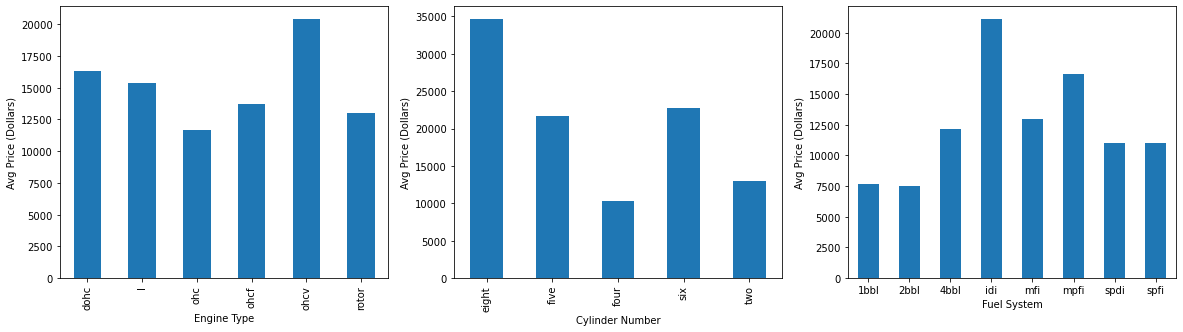

In [40]:
# understand how cars engine spec effect the price ('non-numerical')
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

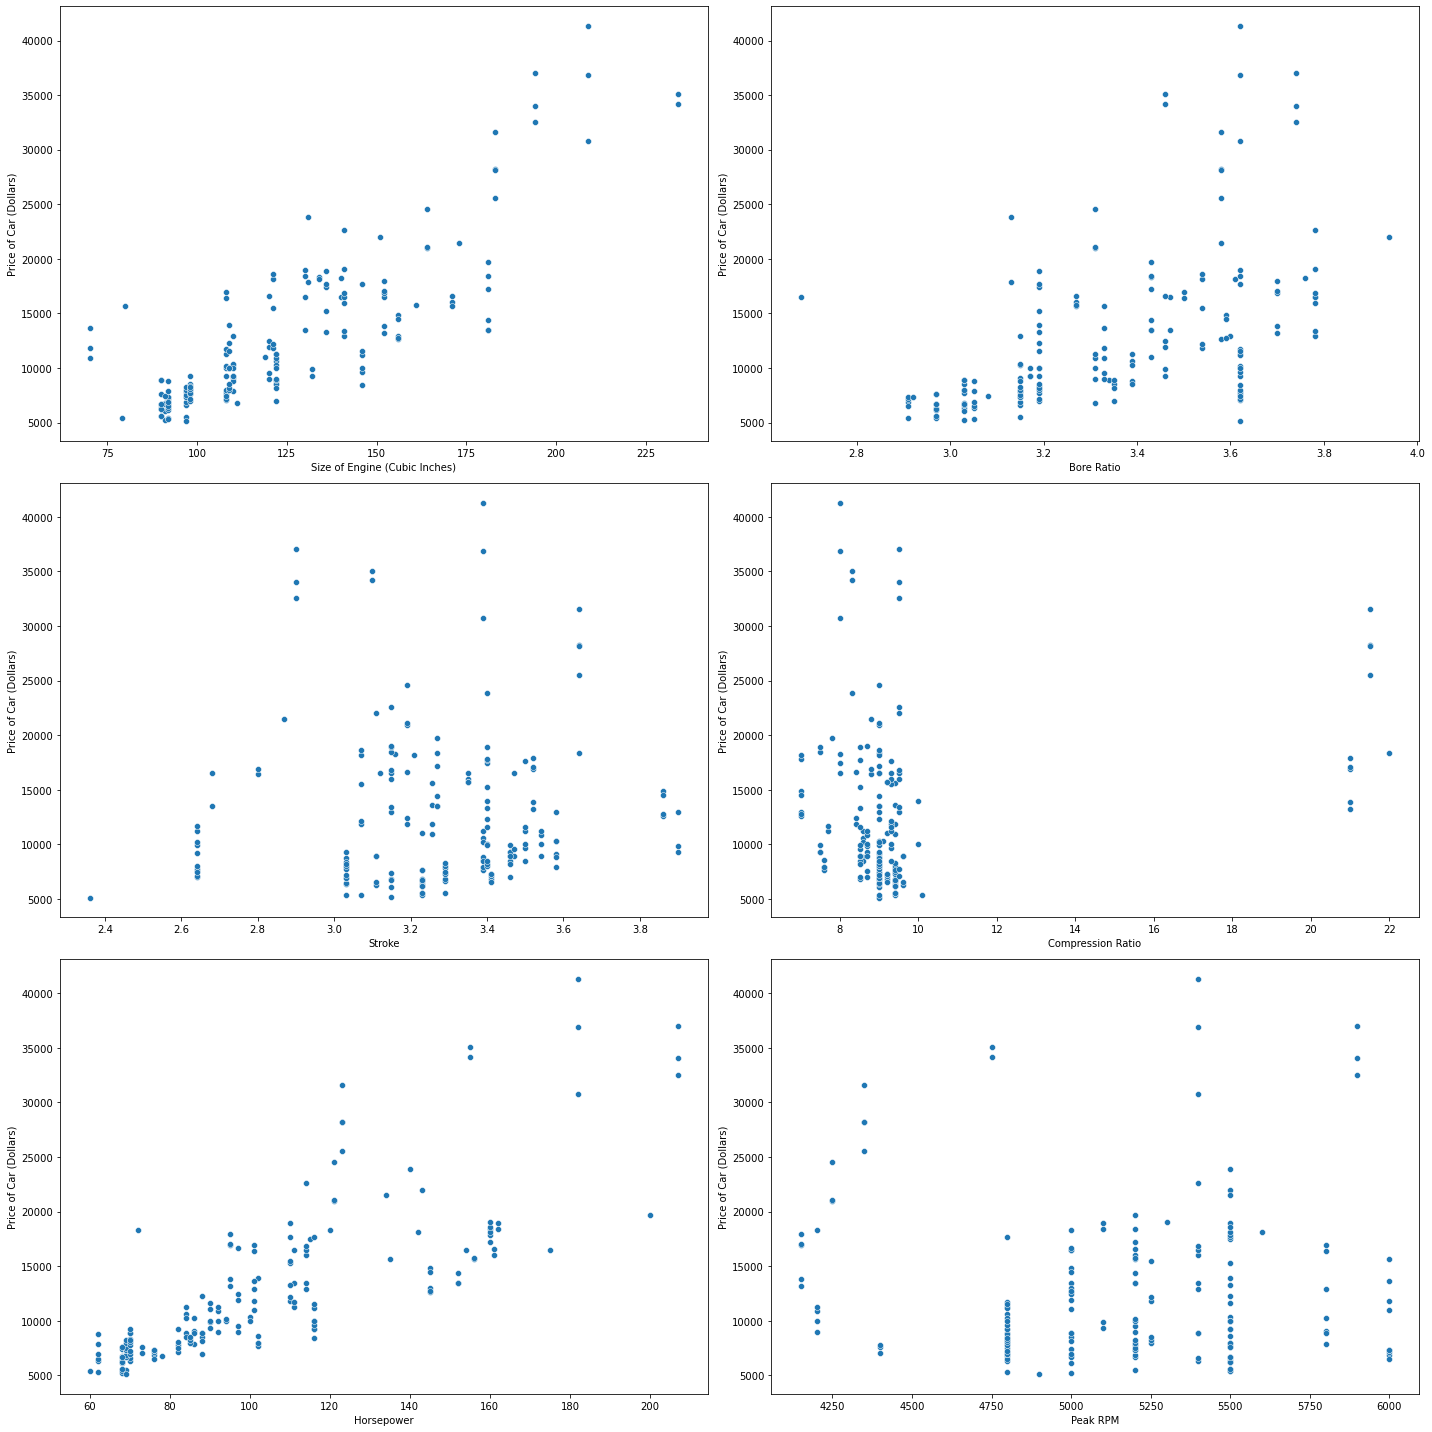

In [41]:
# explore other engine spec as well ('numerical ones')
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

In [42]:
# create new attribute by merging city and highway mpg
df['mileage'] = df['citympg']*0.5 + df['highwaympg']*0.5

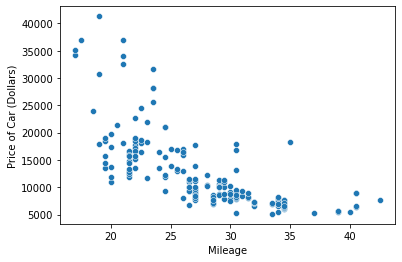

In [43]:
# find out how the milage effect the price
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [44]:
df.sample(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginelocation,enginetype,cylindernumber,fuelsystem,price,brand,log_price,brand_avg_price,brand_category,mileage
108,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,...,front,ohc,four,spdi,7957.0,PLYMOUTH,8.981807,7963.428571,Budget,27.0
95,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,...,front,ohcv,six,mpfi,17199.0,NISSAN,9.752607,10610.764706,Mid_Range,22.0
35,96.5,167.5,65.2,53.3,2236,110,3.15,3.58,9.0,86,...,front,ohc,four,1bbl,7895.0,HONDA,8.973985,8326.833333,Budget,30.0
23,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,68,...,front,ohc,four,2bbl,6229.0,DODGE,8.736971,7875.444444,Budget,34.5
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,front,dohc,four,mpfi,13495.0,ALFA-ROMERO,9.510075,15498.333333,Mid_Range,24.0
25,93.7,157.3,63.8,50.6,1989,90,2.97,3.23,9.4,68,...,front,ohc,four,2bbl,7609.0,DODGE,8.937087,7875.444444,Budget,34.5
10,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,front,ohc,four,mpfi,16430.0,BMW,9.706864,26118.750000,Luxury,26.0
156,102.4,175.6,66.5,54.9,2326,122,3.31,3.54,8.7,92,...,front,ohc,four,mpfi,8948.0,TOYOTA,9.099185,10041.703704,Mid_Range,31.5
60,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,...,front,ohc,four,idi,18344.0,MAZDA,9.817058,10644.000000,Mid_Range,35.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,front,ohc,four,mpfi,13950.0,AUDI,9.543235,17859.166714,Mid_Range,27.0


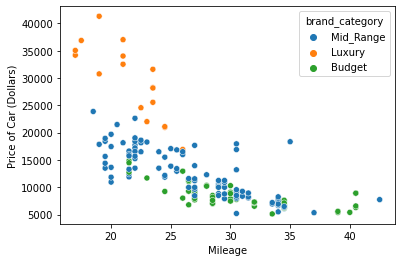

In [45]:
# utilize brand_category to find out why some low mileage car are expensive
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# we found out that the luxury cars have low mileage

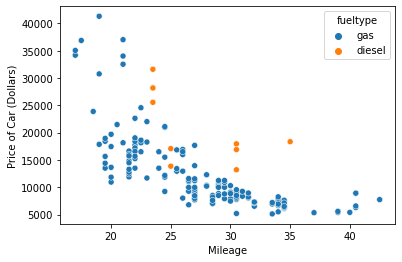

In [46]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

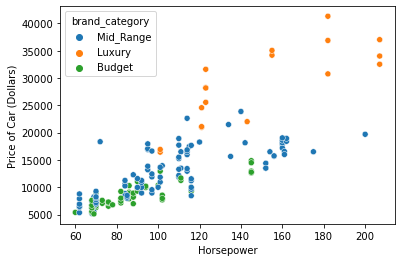

In [47]:
# find out which cars have higher
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Linear Regression Model

In [48]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'log_price', 'brand_category', 'mileage']]

In [49]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,log_price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.510075,Mid_Range,24.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.711116,Mid_Range,24.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,9.711116,Mid_Range,22.5
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,9.543235,Mid_Range,27.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,9.767095,Mid_Range,20.0


## visualizing the data

<Figure size 1080x1080 with 0 Axes>

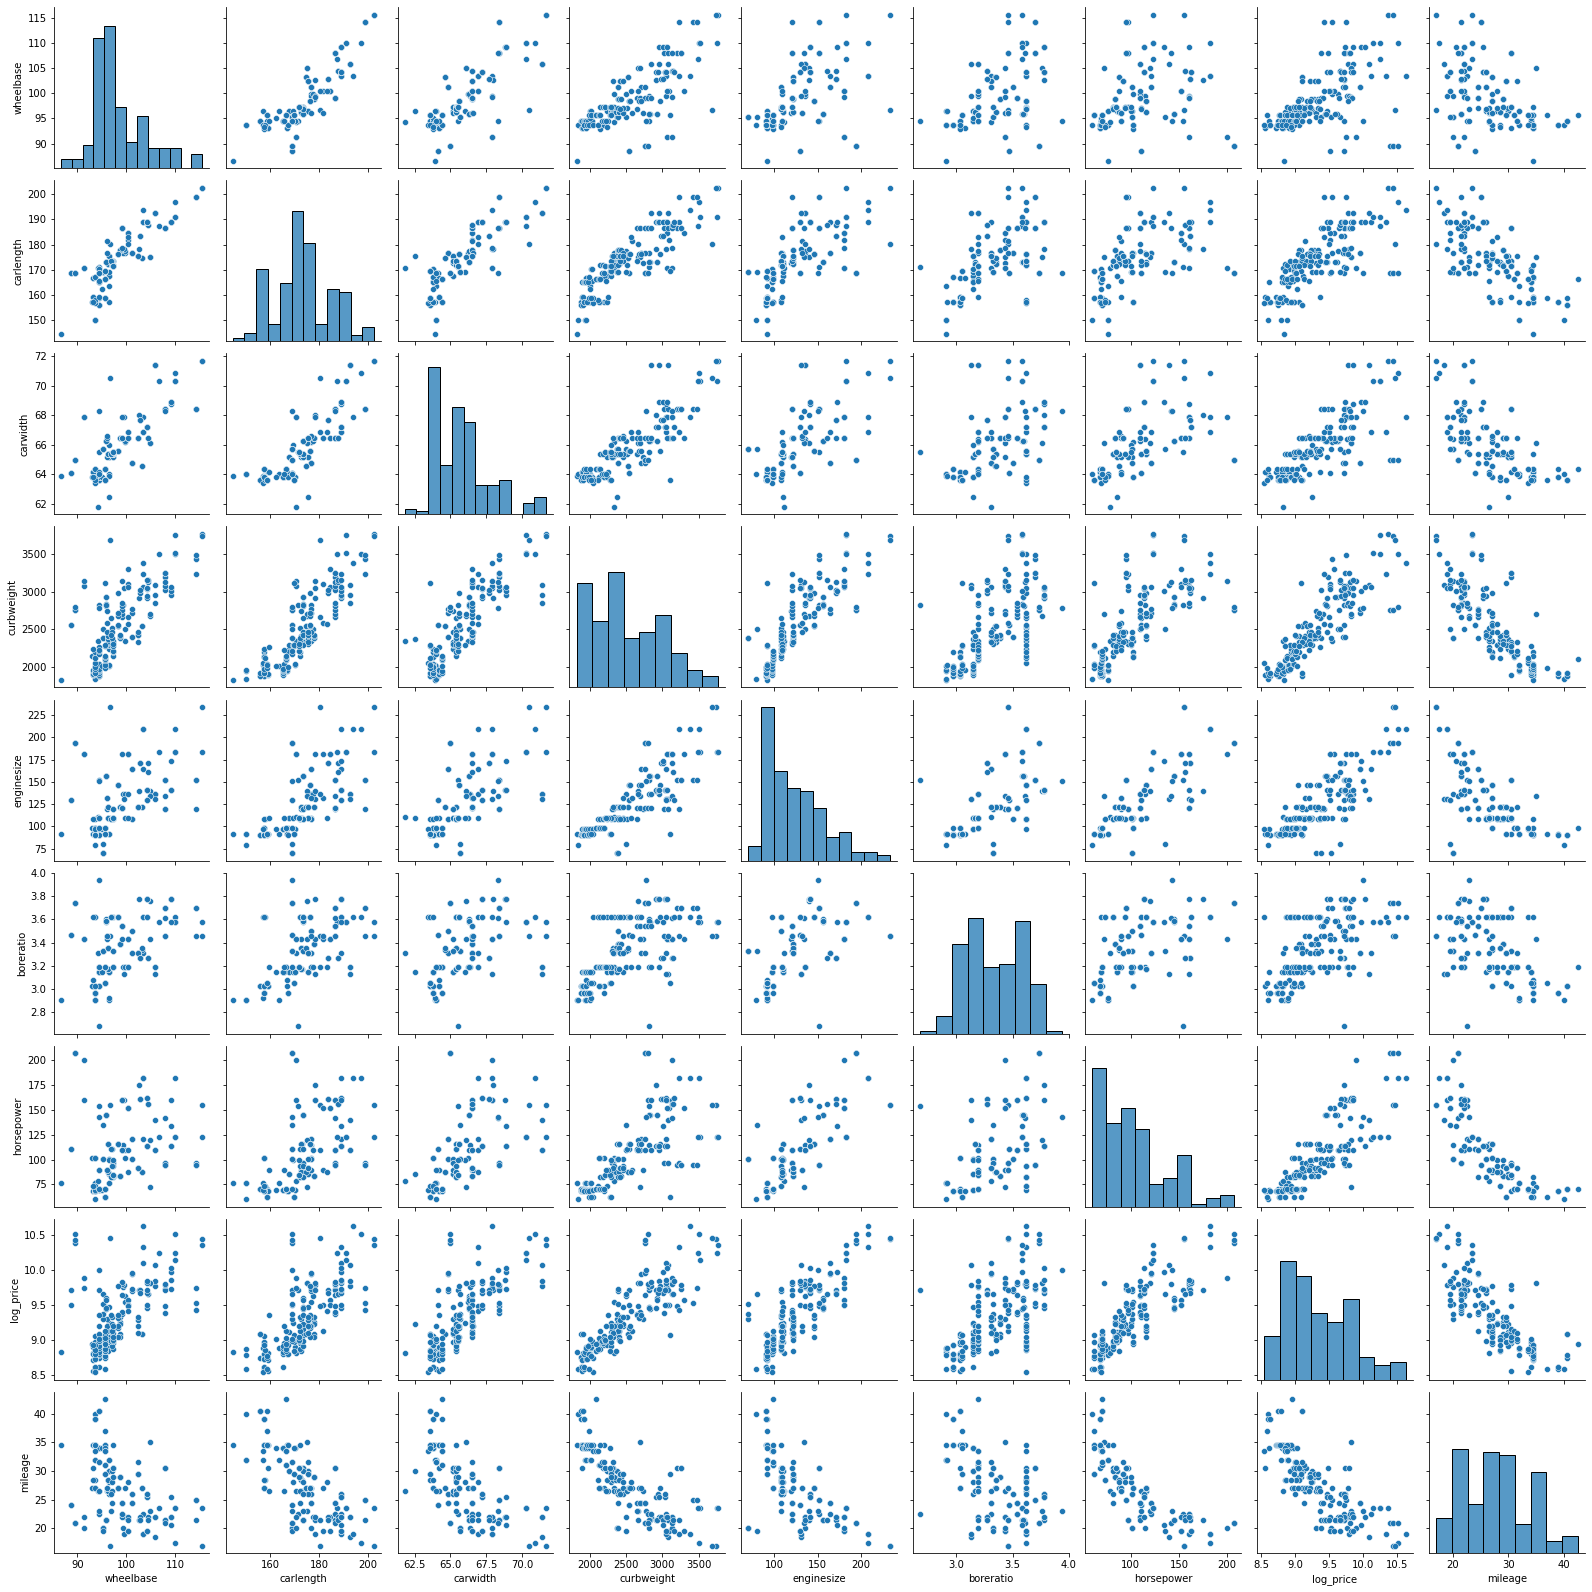

In [50]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

## Visualising Categorical Variables

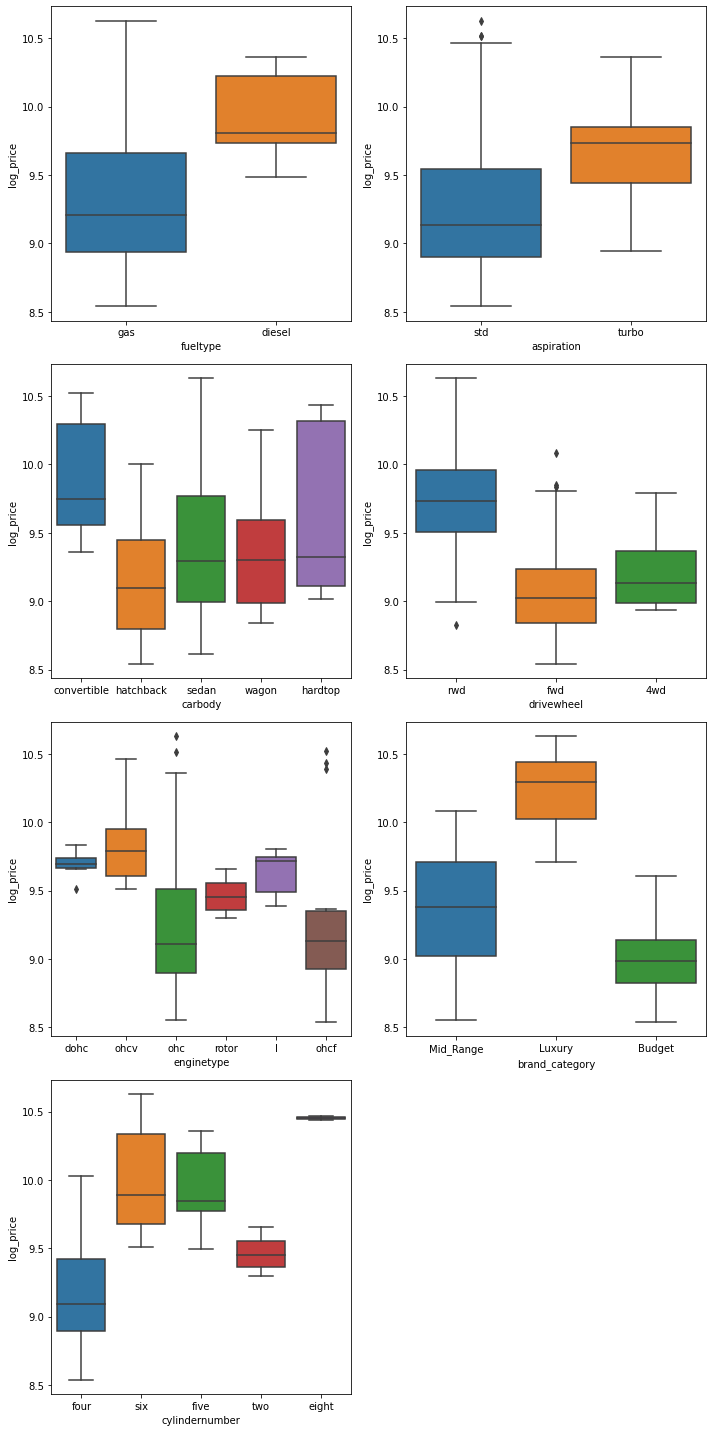

In [51]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'log_price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'log_price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'log_price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'log_price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'log_price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'log_price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'log_price', data = auto)
plt.tight_layout()
plt.show()

## Data Preparation

### Dummy Variables

In [52]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)
carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)
asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)


In [53]:
auto
# now Categorical Variables are converted into Neumerical Variables (dummy variables)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,log_price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,9.510075,24.0,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,9.711116,24.0,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,9.711116,22.5,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,9.543235,27.0,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,9.767095,20.0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,104.3,188.8,67.2,3157,130,3.62,162,9.849559,19.5,0,...,0,0,0,1,0,0,0,1,1,1
178,109.1,188.8,68.9,2952,141,3.78,114,9.731809,25.5,0,...,0,0,0,1,0,0,1,0,0,1
179,109.1,188.8,68.8,3049,141,3.78,160,9.854560,22.0,0,...,0,0,0,1,0,0,1,0,1,1
180,109.1,188.8,68.9,3012,173,3.58,134,9.975110,20.5,0,...,1,0,0,1,0,0,1,0,0,1


# Model Building

### Splitting the Data into Training and Testing sets

In [54]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescaling the Features 

In [55]:
scaler = MinMaxScaler()

In [56]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   182 non-null    float64
 1   carlength   182 non-null    float64
 2   carwidth    182 non-null    float64
 3   curbweight  182 non-null    int64  
 4   enginesize  182 non-null    int64  
 5   boreratio   182 non-null    float64
 6   horsepower  182 non-null    int64  
 7   log_price   182 non-null    float64
 8   mileage     182 non-null    float64
 9   five        182 non-null    uint8  
 10  four        182 non-null    uint8  
 11  six         182 non-null    uint8  
 12  two         182 non-null    uint8  
 13  Luxury      182 non-null    uint8  
 14  Mid_Range   182 non-null    uint8  
 15  l           182 non-null    uint8  
 16  ohc         182 non-null    uint8  
 17  ohcf        182 non-null    uint8  
 18  ohcv        182 non-null    uint8  
 19  rotor       182 non-null    u

In [57]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'log_price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,log_price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
134,0.328125,0.480573,0.325843,0.323053,0.231707,0.854545,0.231293,0.330113,0.431373,0,...,0,0,1,0,0,0,0,1,0,1
89,0.253906,0.253579,0.146067,0.089388,0.164634,0.427273,0.061224,0.228555,0.666667,0,...,0,0,1,0,1,0,0,0,0,1
12,0.492188,0.548057,0.258427,0.456351,0.573171,0.572727,0.414966,0.675296,0.294118,0,...,0,0,0,1,0,0,1,0,0,1
16,0.582031,0.895706,0.606742,0.806587,0.847561,0.854545,0.829932,1.000000,0.078431,0,...,0,0,0,1,0,0,1,0,0,1
145,0.277344,0.333333,0.213483,0.134344,0.170732,0.463636,0.068027,0.197935,1.000000,0,...,0,0,1,0,0,0,1,0,0,1


In [59]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,log_price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.379521,0.477916,0.368221,0.349182,0.311456,0.584538,0.286411,0.372833,0.423653,0.070866,...,0.055118,0.031496,0.629921,0.314961,0.031496,0.346457,0.472441,0.118110,0.188976,0.952756
std,0.197634,0.228981,0.212491,0.242800,0.192180,0.230688,0.227267,0.222629,0.232465,0.257617,...,0.229114,0.175346,0.484738,0.466340,0.175346,0.477725,0.501217,0.324017,0.393040,0.213001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230469,0.333333,0.185393,0.150026,0.164634,0.427273,0.074830,0.196414,0.215686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.324219,0.474438,0.325843,0.295870,0.243902,0.572727,0.231293,0.332314,0.392157,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.460938,0.618609,0.449438,0.527182,0.402439,0.818182,0.380952,0.559489,0.588235,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


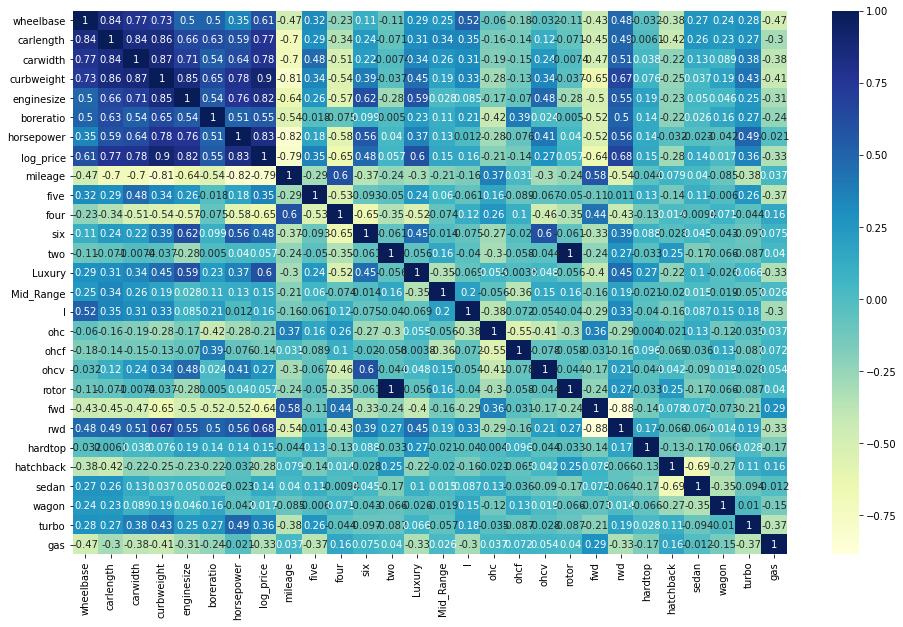

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [61]:
y = df_train.pop('log_price')
X = df_train

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### start training

In [63]:
ml = LinearRegression()

In [64]:
ml.fit(X_train,y_train)

LinearRegression()

In [65]:
preds = ml.predict(X_test)

In [68]:
print('MAE',metrics.mean_absolute_error(y_test, preds))
print('MSE',metrics.mean_squared_error(y_test, preds))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE 0.061501185093745206
MSE 0.005114517279020779
RMSE 0.07151585334050611


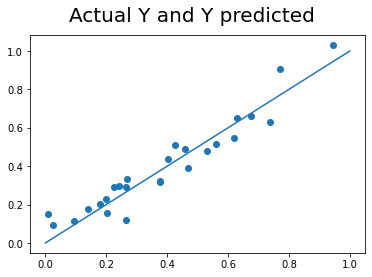

In [72]:
fig = plt.figure()
plt.scatter(y_test,preds)
plt.plot(np.linspace(0,1), np.linspace(0,1))
fig.suptitle('Actual Y and Y predicted', fontsize=20);

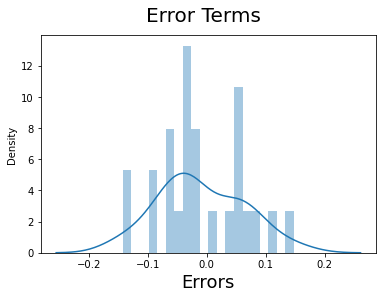

In [74]:
fig = plt.figure()
sns.distplot((y_test - preds), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18);